# Project : U.S Cancer Data Analysis from 1999 to 2016
Dataset from:https://www.cdc.gov/cancer/uscs/dataviz/download_data.htm \n
        In this project we will be analysing cancer cases dataset from 1999 to 2016 and provide some insights 
        such as \n
        i.which state has highest number of cancer cases, both occurence and deaths\n
        ii.What is the Mortality-to -Incidence rate ratio for all the cancer cases over the years\n
        iii.Cancer with highest Incidence and Mortality for every state year-wise\n
        iv. Which kind of cancer has highest occurence and death rates in the states\n

In [1]:
# Importing required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
# Since the dataset is big and has large content 
# I planned on going for interactive visualization using plotly module
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
import plotly.express as px
import seaborn as sns

In [3]:
# plotly & cufflinks in offline mode
py.offline.init_notebook_mode(connected=True)
# cufflink offline mode
cf.go_offline()


# Data Cleaning

In [15]:
data = pd.read_csv(os.environ['USERPROFILE']+'/Desktop/Tools/Assignments/samples/BYAREA.TXT'
                   ,sep='|',header = 'infer')
#Filling empty fields with 0
data = data.fillna(0)
#Replacing different patterns in the empty cells with 0
data.replace({'~':'0','+':'0','-':'0','.':'0'},inplace=True)
# data['AREA'] = data['AREA'].astype(str)
data['COUNT']= data['COUNT'].astype(int)
# data['YEAR']= data['YEAR'].astype(str)

#Replacing some of the names for easier access
data['AREA'] = pd.DataFrame(data['AREA'].replace({'United States (comparable to ICD-O-2)' : 'United States'
                                                 }))
data['SITE'] = pd.DataFrame(data['SITE'].replace({'Female Breast, <i>in situ</i>' : 'Female Breast','Corpus and Uterus, NOS':'Corpus & Uterus'}))
area_list = list(data['AREA'].unique())
cancer_site_list = list(data['SITE'].unique())
cancer_site_list
#Dropping these columns since they aren't used in the analysis
data = data.drop(['AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_CI_UPPER','AGE_ADJUSTED_RATE','CRUDE_CI_LOWER',
                  'CRUDE_CI_UPPER','CRUDE_RATE'],axis=1)

# Dropping rows with these area names since these are the cummulative values region wise 
# and we will not be using those during analysis
places = ['East North Central','East South Central','Middle Atlantic','Midwest','Mountain','New England','Northeast',
                 'Pacific','South','South Atlantic','West','West North Central','West South Central','Los Angeles',
         'San Jose-Monterey','San Francisco-Oakland','Seattle-Puget Sound']
for place in places:
    regg = data[data['AREA'] == place].index
    data.drop(regg,inplace=True)
data = data[(data['YEAR'] != '2012-2016')]

#Final dataset looks lis
data

,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
0,Alabama,9300,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999
1,Alabama,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999
2,Alabama,9473,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000
3,Alabama,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000
4,Alabama,9970,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001
...,...,...,...,...,...,...,...,...
1089249,Wyoming,29,Mortality,549026,White,Male and Female,Urinary Bladder,2014
1089250,Wyoming,138,Incidence,551912,White,Male and Female,Urinary Bladder,2015
1089251,Wyoming,20,Mortality,551912,White,Male and Female,Urinary Bladder,2015
1089252,Wyoming,128,Incidence,550474,White,Male and Female,Urinary Bladder,2016


# Data Analysis & Visualisation

Wrong Interpretation

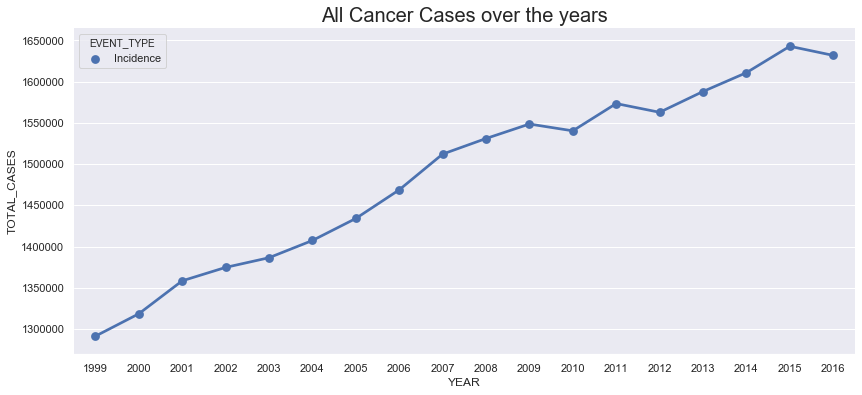

In [19]:
# I tried creating visualizations with seaborn & matplotlib 
# but the visualization representation wasn't as expected. 
# For example: The below visualization makes Mortality cases look almost as if there were
#     no deaths at all since 1999. Which is wrong as per the dataset. Hence opted for 
#     Interactive visualization
import seaborn as sns;sns.set()
all_cancer_sites = data[( data['AREA'] !='United States') & ( data['SITE'] =='All Cancer Sites Combined')
                         &((data['RACE'] == 'All Races') & (data['SEX'] == 'Male and Female')) ]
cases_year_area = all_cancer_sites.groupby(['YEAR','EVENT_TYPE'], sort=False)["COUNT"].sum().reset_index(name ='TOTAL_CASES')

fig,ax = plt.subplots(figsize = (14,6))
ax_1 = sns.pointplot(data=cases_year_area, x=cases_year_area['YEAR'],
                  y=cases_year_area['TOTAL_CASES'],hue='EVENT_TYPE',ax=ax)
ax_1.set_title('All Cancer Cases over the years',size=20)
sns.despine(left=True)

 Total Number of cases - Year wise(Cummulative data)

In [5]:
cases_all_over = data[( data['AREA']=='United States')]
cases_all_over = cases_all_over[((cases_all_over['RACE'] == 'All Races') & (cases_all_over['SEX'] == 'Male and Female'))]
# cases_all_over
cases_all_over.iplot(x='YEAR',y='COUNT',xTitle='Years 1996-2016', title='Total No. of cases-Year wise',yTitle='No. of Cases',color='Blue')

State with highest number of Cancer Incidences & Deaths combining data from 1999-2016

[Text(0, 0.5, 'States'), Text(0.5, 0, 'No. of Cases')]

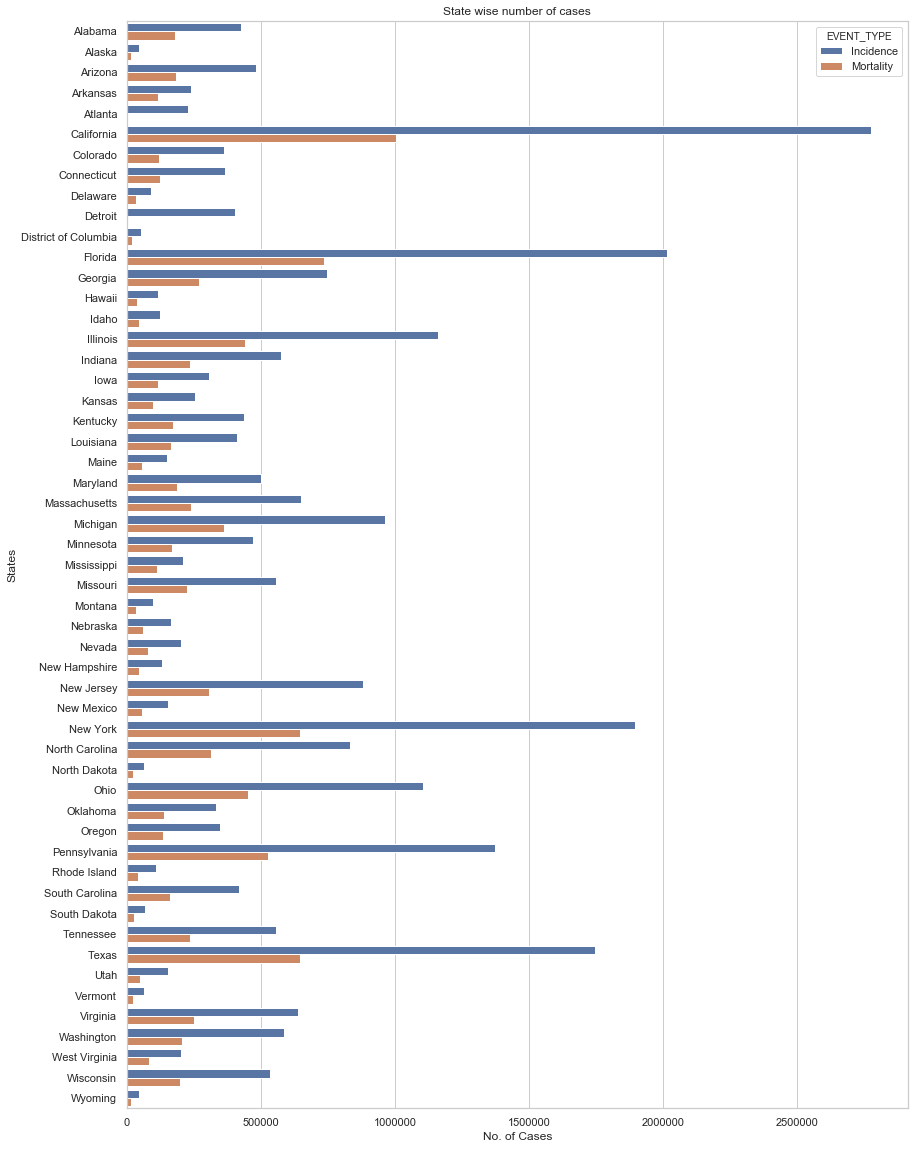

In [6]:
area_cancer_stats = data[( data['AREA'] !='United States') & ( data['SITE'] =='All Cancer Sites Combined')
                         &((data['RACE'] == 'All Races') & (data['SEX'] == 'Male and Female')) ]


grouped = area_cancer_stats.groupby(['AREA','EVENT_TYPE'])['COUNT'].sum().reset_index(name='AREA_WISE')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14,20))
tips = sns.load_dataset("tips")
ax_1 = sns.barplot(x="AREA_WISE", y="AREA",hue='EVENT_TYPE',data=grouped)
ax_1.set_title(label = 'State wise number of cases')
ax_1.set(xlabel = 'No. of Cases', ylabel='States')


Mortality-to-Incidence Rate ratio on all the cancer cases over the years

In [7]:
grouped_inc = grouped[grouped['EVENT_TYPE']=='Incidence']
grouped_mor = grouped[grouped['EVENT_TYPE']=='Mortality']
grouped_inc['Incidence_rate'] = grouped_inc['AREA_WISE']
grouped_mor['Mortality_rate'] = grouped_mor['AREA_WISE']
grouped_inc = grouped_inc.drop(['EVENT_TYPE','AREA_WISE'],axis = 1)
grouped_mor = grouped_mor.drop(['EVENT_TYPE','AREA_WISE'],axis = 1)
result= pd.merge(grouped_inc,grouped_mor,on='AREA')
result['MIR'] = result['Mortality_rate']/result['Incidence_rate']
result

result.iplot(x='AREA',y='MIR',interpolation='spline')

In [8]:
# Cleaning data for different sites details and plotting the visualization based on the state

dif_sites_info = data[((data['SITE'] !='All Cancer Sites Combined')
                       &(data['SEX'] == 'Male and Female')
                       &(data['AREA']!='United States'))]
dif_sites_info = dif_sites_info.groupby(['AREA','EVENT_TYPE','YEAR','SITE']).sum().reset_index()
dif_sites_info = dif_sites_info.drop('POPULATION',axis=1)
lst =str(list(dif_sites_info.AREA.unique()))


In [12]:
# Here we will be taking input from the user for which state he needs the 
# visualization. The visualization shows all the types of cancer cases
# seperating mortality and incidences in the state


area = input('Enter a U.S State from the list\n\n'+lst+' \n\n : ')
yearly_info_data = dif_sites_info
yearly_cases_state_wise = yearly_info_data.groupby(['YEAR','SITE','EVENT_TYPE','AREA'])['COUNT'].sum().reset_index(name='CASES_PER_YEAR')
incidence_yearly_cases = yearly_cases_state_wise[
    ((yearly_cases_state_wise['EVENT_TYPE'] == 'Incidence') &(yearly_cases_state_wise['AREA'] == area) )
    ]

fig = px.scatter(incidence_yearly_cases,x='YEAR',y='CASES_PER_YEAR',labels={'YEAR':'Year from 1999-2016','CASES_PER_YEAR':'No of cases per year'},
                 color='SITE',hover_name='AREA',title='Cancer Occurences over the Years in the state -'+area)

fig.show()

mortality_yearly_cases = yearly_cases_state_wise[
    (yearly_cases_state_wise['EVENT_TYPE'] == 'Mortality') &(yearly_cases_state_wise['AREA'] == area)
    ]

fig_2 = px.scatter(mortality_yearly_cases,x='YEAR',y='CASES_PER_YEAR',labels={'YEAR':'Year from 1999-2016','CASES_PER_YEAR':'No of cases per year'},
                 color='SITE',hover_name='AREA',title='Cancer Death rates over the Years in the state -'+area)

fig_2.show()

Enter a U.S State from the list

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Atlanta', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Detroit', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'] 

 : California


In [14]:
# This visualization shows as per a particular year what is the 
# incidence & mortality rates in a particular cancer area

# https://plotly.com/python/multiple-axes/#muliple-yaxes-subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

year = str(input('Enter a Year between "1999-2016" : '))
dif_sites = dif_sites_info[(dif_sites_info['YEAR']==year)]

cases_year_area = dif_sites.groupby(['EVENT_TYPE','SITE'], sort=False)["COUNT"].sum().reset_index(name ='TOTAL_CASES')

Incidence = cases_year_area[(cases_year_area['EVENT_TYPE'] == 'Incidence')]
Mortality = cases_year_area[(cases_year_area['EVENT_TYPE'] == 'Mortality')]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=Incidence['TOTAL_CASES'], y=Incidence['SITE'], name="Incidence"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=Mortality['TOTAL_CASES'], y=Mortality['SITE'], name="Mortality"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Cancer Cases as per Year-"+year
)

fig.show()



Enter a Year between "1999-2016" : 2015


# Conclusion:
    From my analysis I understand that over the years the number of cancer cases has been increasing gradually 
    and the most common & highly occuring cancer in the United States is Breast cancer,
    but the highest number of deaths are in Lung & Bronchus cancer. Since there is no treatment for it